In [1]:
import tweepy
import json
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()
from config import consumer_key, consumer_secret, access_token, access_token_secret
import pandas as pd
import matplotlib.pyplot as plt

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api = tweepy.API(auth)

In [87]:
target_uers=["BBC","BostonGlobe" ,"CBS", "CNN", "FoxNews", ]



sentiments = []

for user in target_uers:
    # Lists for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweets_ago = []
    news_source = []
    
    counter = 0


    for pages in tweepy.Cursor(api.user_timeline, id=user).pages(5):
        # page is a tweet "status"
        #page = page[0]
        #could also use the following instead of 

        for page in pages:

            #must have these lines when you are using cursor
            tweet = json.dumps(page._json, indent=3)
            tweet = json.loads(tweet)

            # Parse the tweet to identify its text
            text= tweet["text"]

            # Analyze the sentiment of the tweet
            total_scores = analyzer.polarity_scores(text)
            compound=total_scores["compound"]
            pos = total_scores["pos"]
            neu = total_scores["neu"]
            neg = total_scores["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweets_ago.append(counter) 
            news_source.append(user)

            #calculation tweet agao
            counter = counter +1
            # Add the sentiment analyses to the respective lists
    sentiments.append(pd.DataFrame({
            "Compound": compound_list,
            "Positive": positive_list,
            "Negative": negative_list,
            "Neutral": neutral_list,
            "Tweets Ago": tweets_ago,
            "News Source": news_source}))
#     #for sentiment in sentiments:
#         sentiments_df = pd.DataFrame(sentiments)
#         x_axis=np.arange(len(sentiments_df["Compound"]))
#         plt.plot(x_axis,
#         sentiments_df["Compound"], marker="o", linewidth=0.5,
#         alpha=0.8, label=user)
#     plt.ylabel("Tweets Ago")
#     plt.ylabel("Tweet Polarity")
#     plt.title("Sentiment Analysis of Tweet 3/10/18" + str(user))

#     plt.show()


# Print the average sentiments of the tweets
    #print("")
    #print("User: %s" % user)
    #print("Compound: %s" % np.mean(compound_list))
    #print("Positive: %s" % np.mean(positive_list))
    #print("Neutral: %s" % np.mean(neutral_list))
    #print("Negative: %s" % np.mean(negative_list))
    #print(sentiments)

In [95]:
concat_df = pd.concat([df for df in sentiments])
concat_df

#concat_df.index
grouped=concat_df.groupby("News Source")
#BBC = concat_df["Compound"].loc[:,'BBC'].values
#grouped.count()
concat_df.index

concat_df

Compound  Negative  Neutral News Source  Positive  Tweets Ago
0     0.7783     0.000    0.726         BBC     0.274           0
1     0.4926     0.000    0.610         BBC     0.390           1
2     0.5719     0.000    0.791         BBC     0.209           2
3     0.0000     0.000    1.000         BBC     0.000           3
4     0.0000     0.000    1.000         BBC     0.000           4
5     0.0000     0.000    1.000         BBC     0.000           5
6     0.3400     0.000    0.841         BBC     0.159           6
7     0.6124     0.000    0.667         BBC     0.333           7
8     0.3612     0.000    0.902         BBC     0.098           8
9    -0.6486     0.238    0.762         BBC     0.000           9
10    0.5574     0.000    0.841         BBC     0.159          10
11    0.0000     0.000    1.000         BBC     0.000          11
12    0.4939     0.000    0.814         BBC     0.186          12
13    0.6486     0.000    0.813         BBC     0.187          13
14    0.0000     0.000    1.000         BBC     0.000          14
15    0.4939     0.000    0.802         BBC     0.198          15
16    0.4404     0.000    0.847         BBC     0.153          16
17    0.6115     0.000    0.840         BBC     0.160          17
18   -0.4019     0.172    0.828         BBC     0.000          18
19    0.3327     0.000    0.809         BBC     0.191          19
20    0.5574     0.108    0.613         BBC     0.278          20
21   -0.3818     0.174    0.737         BBC     0.089          21
22   -0.2960     0.095    0.905         BBC     0.000          22
23    0.3400     0.000    0.882         BBC     0.118          23
24    0.5214     0.000    0.806         BBC     0.194          24
25    0.1901     0.000    0.821         BBC     0.179          25
26    0.0000     0.000    1.000         BBC     0.000          26
27   -0.4767     0.134    0.866         BBC     0.000          27
28   -0.1779     0.132    0.766         BBC     0.102          28
29    0.0000     0.000    1.000         BBC     0.000          29
..       ...       ...      ...         ...       ...         ...
70    0.1280     0.000    0.909     FoxNews     0.091          70
71    0.0000     0.000    1.000     FoxNews     0.000          71
72   -0.9118     0.602    0.310     FoxNews     0.088          72
73   -0.6486     0.235    0.765     FoxNews     0.000          73
74   -0.6705     0.220    0.780     FoxNews     0.000          74
75    0.7579     0.000    0.629     FoxNews     0.371          75
76   -0.6486     0.249    0.751     FoxNews     0.000          76
77   -0.7783     0.464    0.536     FoxNews     0.000          77
78    0.0000     0.000    1.000     FoxNews     0.000          78
79   -0.4939     0.286    0.714     FoxNews     0.000          79
80   -0.4939     0.151    0.849     FoxNews     0.000          80
81    0.4588     0.000    0.864     FoxNews     0.136          81
82   -0.1280     0.111    0.889     FoxNews     0.000          82
83    0.0000     0.000    1.000     FoxNews     0.000          83
84   -0.8020     0.545    0.455     FoxNews     0.000          84
85   -0.0516     0.208    0.595     FoxNews     0.196          85
86   -0.5994     0.279    0.611     FoxNews     0.109          86
87   -0.8126     0.481    0.519     FoxNews     0.000          87
88    0.3818     0.000    0.776     FoxNews     0.224          88
89    0.5719     0.000    0.791     FoxNews     0.209          89
90    0.0000     0.000    1.000     FoxNews     0.000          90
91    0.6523     0.000    0.761     FoxNews     0.239          91
92   -0.5994     0.196    0.804     FoxNews     0.000          92
93    0.3612     0.000    0.894     FoxNews     0.106          93
94    0.0000     0.000    1.000     FoxNews     0.000          94
95    0.3612     0.000    0.737     FoxNews     0.263          95
96   -0.8442     0.351    0.649     FoxNews     0.000          96
97    0.3612     0.000    0.884     FoxNews     0.116          97
98   -0.5256     0.159    0.841     FoxNews 

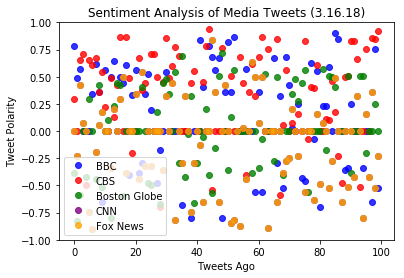

In [134]:
sentiments
sentiment["Compound"]
BBC=sentiments[0]["Compound"]
Boston_Globe = sentiments[1]["Compound"]
CBS=sentiments[2]["Compound"]
CNN=sentiments[3]["Compound"]
CNN=sentiments[3]["Compound"]
Fox=sentiments[4]["Compound"]

total_x_axis= np.arange(0,100,1)
plt.plot((np.arange(0,100,1)),BBC, marker="o",color="b", linewidth=0.0, alpha=0.8, label="BBC")
plt.plot((np.arange(0,100,1)),CBS, marker="o",color ="r" ,linewidth=0.0, alpha=0.8, label="CBS")
plt.plot((np.arange(0,100,1)),Boston_Globe, marker="o",color ="g" ,linewidth=0.0, alpha=0.8, label="Boston Globe")
plt.plot((np.arange(0,100,1)),CNN, marker="o",color ="purple" ,linewidth=0.0, alpha=0.8, label="CNN")
plt.plot((np.arange(0,100,1)),CNN, marker="o",color ="orange" ,linewidth=0.0, alpha=0.8, label="Fox News")

plt.ylim(-1,1) 
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (3.16.18)")


plt.legend(loc="best")
plt.show()


In [54]:
    for sentiment in sentiments:
        #sentiments_df = pd.DataFrame(sentiments)
        #x_axis=np.arange(len(sentiments["Compound"]))
        x_axis = np.arange(1,100,1)
        plt.plot(x_axis,
        sentiments["Compound"], marker="o", linewidth=0.5,
        alpha=0.8, label=user)
    plt.ylabel("Tweets Ago")
    plt.ylabel("Tweet Polarity")
    plt.title("Sentiment Analysis of Tweet 3/10/18")

    plt.show()


TypeError: list indices must be integers or slices, not str

In [89]:
sentiments

[    Compound  Negative  Neutral News Source  Positive  Tweets Ago
 0     0.7783     0.000    0.726         BBC     0.274           0
 1     0.4926     0.000    0.610         BBC     0.390           1
 2     0.5719     0.000    0.791         BBC     0.209           2
 3     0.0000     0.000    1.000         BBC     0.000           3
 4     0.0000     0.000    1.000         BBC     0.000           4
 5     0.0000     0.000    1.000         BBC     0.000           5
 6     0.3400     0.000    0.841         BBC     0.159           6
 7     0.6124     0.000    0.667         BBC     0.333           7
 8     0.3612     0.000    0.902         BBC     0.098           8
 9    -0.6486     0.238    0.762         BBC     0.000           9
 10    0.5574     0.000    0.841         BBC     0.159          10
 11    0.0000     0.000    1.000         BBC     0.000          11
 12    0.4939     0.000    0.814         BBC     0.186          12
 13    0.6486     0.000    0.813         BBC     0.187        

In [ ]:
sentiments.append(pd.DataFrame({
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": tweets_ago,
                               "News Source": news_source}))

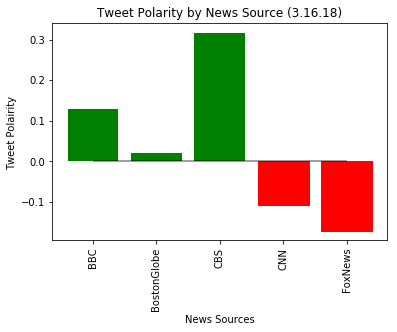

In [94]:
#calculating the mean compound score for each news site
mean_df =grouped["Compound"].mean()


#Creating x-axis the legnth of the mean_df
x_axis = np.arange(len(mean_df))

#Creating var chart
barlist=plt.bar(x_axis, mean_df, align="center", color='g')
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(x_axis, target_uers, rotation="vertical")

barlist[3].set_color('r')
barlist[4].set_color('r')

# Give our chart some labels and a tile
plt.title("Tweet Polarity by News Source (3.16.18)")
plt.xlabel("News Sources")
plt.ylabel("Tweet Polairity ")

plt.hlines(0, 0, 4, alpha=0.5)
plt.show()

In [91]:
mean_df

News Source
BBC            0.130020
BostonGlobe    0.020380
CBS            0.316436
CNN           -0.106999
FoxNews       -0.169916
Name: Compound, dtype: float64